# CARS

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
# Import DataFrames
counties = pd.read_csv('counties.csv', delimiter=';')
crashes_poverty = pd.read_csv('crashes_poverty.csv', delimiter=';')
vehicles = pd.read_csv('vehicles.csv')

## 1. Counties

In [4]:
counties.head(10)

,State,Abbreviation,Postal\ncode
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,American Samoa,,AS
3,Arizona,Ariz.,AZ
4,Arkansas,Ark.,AR
5,California,Calif.,CA
6,Colorado,Colo.,CO
7,Connecticut,Conn.,CT
8,Delaware,Del.,DE
9,Dist. of Columbia,D.C.,DC


In [5]:
counties.columns

Index(['State', 'Abbreviation', 'Postal\ncode'], dtype='object')

In [6]:
#Cambiar nombre a columna 'Postal\ncode''
counties = counties.rename(columns={'Postal\ncode': 'Postal'})
counties['Postal'] = counties['Postal'].str.lower()

In [7]:
# Valores Únicos
counties['Postal'].unique()

array(['al', 'ak', 'as', 'az', 'ar', 'ca', 'co', 'ct', 'de', 'dc', 'fl',
       'ga', 'gu', 'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me',
       'md', 'mh', 'ma', 'mi', 'fm', 'mn', 'ms', 'mo', 'mt', 'ne', 'nv',
       'nh', 'nj', 'nm', 'ny', 'nc', 'nd', 'mp', 'oh', 'ok', 'or', 'pw',
       'pa', 'pr', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'vt', 'va', 'vi',
       'wa', 'wv', 'wi', 'wy'], dtype=object)

In [18]:
# Estados
counties['State'].unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'Dist. of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii',
       'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Marshall Islands',
       'Massachusetts', 'Michigan', 'Micronesia', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Northern Marianas', 'Ohio',
       'Oklahoma', 'Oregon', 'Palau', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Virgin Islands',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

## 2. Crashes Poverty

In [6]:
crashes_poverty.head()

,State,Number of Crashes,Poverty
0,Florida,1011,13.7
1,Tennessee,437,15.2
2,New Mexico,344,18.8
3,Alabama,336,16.8
4,Louisiana,271,18.7


In [8]:
crashes_poverty.State.unique()

array(['Florida', 'Tennessee', 'New Mexico', 'Alabama', 'Louisiana',
       'Texas', 'Arizona', 'Washington', 'South Carolina',
       'North Carolina', 'Virginia', 'Ohio', 'Nebraska', 'Wyoming',
       'Missouri', 'New York', 'Iowa', 'Nevada', 'Connecticut',
       'Arkansas', 'Idaho', 'Kansas', 'Oklahoma', 'Montana', 'Oregon',
       'Georgia', 'Mississippi', 'Maryland', 'California', 'Wisconsin',
       'Kentucky', 'Utah', 'Colorado', 'Michigan', 'New Jersey',
       'Pennsylvania', 'Delaware', 'Indiana', 'West Virginia', 'Illinois',
       'Maine', 'Massachusetts', 'North Dakota', 'Hawaii', 'Minnesota',
       'New Hampshire', 'South Dakota', 'Vermont', 'Rhode Island',
       'Alaska'], dtype=object)

In [9]:
crashes_poverty.shape

(50, 3)

## 3. Vehicles

In [10]:
print(vehicles)

                      region  price    year manufacturer  \
0               palm springs   3400  2002.0   volkswagen   
1                      salem   6300  2004.0    chevrolet   
2                long island   9997  2011.0       nissan   
3                   amarillo  21504  2017.0    chevrolet   
4              inland empire  28900  2009.0     cadillac   
...                      ...    ...     ...          ...   
26983     mcallen / edinburg   7200  2007.0    chevrolet   
26984             western IL      0  2019.0         ford   
26985  ft myers / SW florida  10000  2002.0    chevrolet   
26986                 tucson   3800  2005.0        dodge   
26987            los angeles  21800  2013.0          bmw   

                              model  condition    cylinders fuel  odometer  \
0                         jetta gls  excellent  4 cylinders  gas  100000.0   
1           silverado 2500 crew cab        NaN  8 cylinders  gas  208942.0   
2                            xterra  excellen

In [11]:
vehicles.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'vin',
       'drive', 'size', 'type', 'paint_color', 'description', 'county',
       'state', 'lat', 'long'],
      dtype='object')

In [12]:
vehicles.shape

(26988, 21)

In [13]:
vehicles.isnull().sum()

region              0
price               0
year               50
manufacturer     1194
model             423
condition       11644
cylinders       11306
fuel              168
odometer         4995
title_status      137
transmission      236
vin             10872
drive            7996
size            18642
type             7161
paint_color      8790
description         3
county          26988
state               0
lat               359
long              359
dtype: int64

In [14]:
vehicles.describe()

,price,year,odometer,county,lat,long
count,2.698800e+04,26938.000000,2.199300e+04,0.0,26629.000000,26629.000000
mean,5.511630e+04,2009.924939,9.890055e+04,NaN,37.227607,-96.516176
std,6.795834e+06,8.873713,1.155220e+05,NaN,5.754137,17.869100
min,0.000000e+00,1900.000000,0.000000e+00,NaN,-67.501400,-159.376000
25%,4.450000e+03,2007.000000,4.544400e+04,NaN,33.764300,-117.570000
50%,9.800000e+03,2012.000000,9.094300e+04,NaN,37.640900,-89.294500
75%,1.790000e+04,2015.000000,1.354000e+05,NaN,41.590000,-81.739000
max,1.116081e+09,2021.000000,9.999999e+06,NaN,64.837800,79.900600


In [15]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26988 entries, 0 to 26987
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   region        26988 non-null  object 
 1   price         26988 non-null  int64  
 2   year          26938 non-null  float64
 3   manufacturer  25794 non-null  object 
 4   model         26565 non-null  object 
 5   condition     15344 non-null  object 
 6   cylinders     15682 non-null  object 
 7   fuel          26820 non-null  object 
 8   odometer      21993 non-null  float64
 9   title_status  26851 non-null  object 
 10  transmission  26752 non-null  object 
 11  vin           16116 non-null  object 
 12  drive         18992 non-null  object 
 13  size          8346 non-null   object 
 14  type          19827 non-null  object 
 15  paint_color   18198 non-null  object 
 16  description   26985 non-null  object 
 17  county        0 non-null      float64
 18  state         26988 non-nu

## 3.1 Price

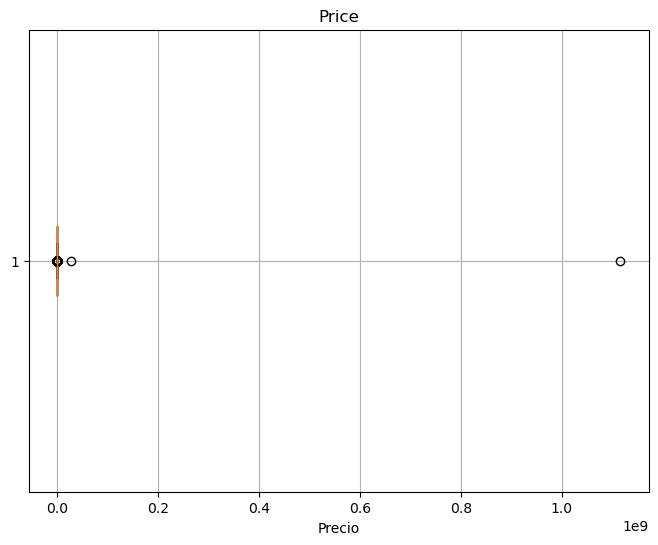

In [17]:
# Boxplot de la variable 'price'

# Tamaño
plt.figure(figsize=(8, 6))
# Boxplot
plt.boxplot(vehicles['price'], vert=False) 
# Titulo
plt.title('Price') 
# Etiqueta Eje x
plt.xlabel('Precio')
plt.grid(True)
plt.show()

In [18]:
# Se observan valores atípicos

# Se ordenan los datos por la variable 'price'
vehicles.sort_values(by='price').tail(10)


,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,vin,drive,size,type,paint_color,description,county,state,lat,long
23969,bend,185997,2019.0,mercedes-benz,g-class amg g 63,NaN,8 cylinders,gas,4703.0,clean,...,WDCYC7HJ8KX318050,4wd,NaN,SUV,NaN,We are by appointment only. Please call to mak...,NaN,or,45.5239,-122.5380
3838,orange county,199888,2012.0,ferrari,458 italia,excellent,8 cylinders,gas,12000.0,clean,...,NaN,NaN,NaN,NaN,white,Only 12K Miles On This Beautiful 458 Italia Co...,NaN,ca,33.6801,-117.9090
5081,los angeles,233988,2019.0,NaN,Lamborghini Urus,NaN,NaN,gas,7447.0,clean,...,NaN,NaN,NaN,SUV,white,2019 Lamborghini Urus SUVExterior Color: Bianc...,NaN,ca,34.1687,-118.3710
6068,odessa / midland,266499,2018.0,NaN,LAMBORGHINI HURRACAN,NaN,NaN,gas,4130.0,clean,...,ZHWUD4ZFXJLA09111,NaN,NaN,coupe,white,2018 Lamborghini Huracan Performante Offer...,NaN,tx,33.0178,-96.6909
3697,poconos,270000,2013.0,dodge,challenger,like new,8 cylinders,gas,22000.0,clean,...,NaN,rwd,mid-size,coupe,purple,Plum crazy srt 8 with 22000 original miles. Pe...,NaN,pa,40.9748,-75.5842
10406,palm springs,275000,1971.0,ferrari,365 gtc/4,NaN,12 cylinders,gas,34010.0,NaN,...,F101AC10014633,rwd,NaN,coupe,red,"1971 *Ferrari* *365 GTC/4* Coupe - $275,000Ca...",NaN,ca,33.6016,-116.1630
1449,pensacola,1234567,1987.0,gmc,sierra,excellent,8 cylinders,gas,NaN,clean,...,NaN,rwd,NaN,NaN,NaN,Two owner. Interior redone. New radio and spea...,NaN,fl,30.6698,-87.1794
12933,kenosha-racine,1234567,1991.0,ford,mustang,good,8 cylinders,gas,NaN,clean,...,NaN,rwd,NaN,NaN,NaN,"91 Ford Mustang, GT-40,E303 cam, BBK exhaust, ...",NaN,wi,14.4035,-103.5560
23703,dayton / springfield,28003500,2007.0,chevrolet,impala lt,good,6 cylinders,gas,2000.0,clean,...,NaN,fwd,NaN,NaN,blue,07 CHEVY IMPALA LT 3.5L V6 200K MILES PWR WIND...,NaN,oh,39.7982,-84.3211
19141,gainesville,1116080943,2012.0,honda,civic,excellent,NaN,gas,98090.0,clean,...,2HGFG3B56CH547145,fwd,NaN,coupe,red,2012 Honda Civic LX Coupe 2D Coupe Ready To ...,NaN,fl,29.6732,-82.3226


In [19]:
# Se crea un nuevo DataFrame en el que se elimina las observaciones especificadas por sus índices

vehicles_adj = vehicles.drop([1449, 12933, 23703, 19141])

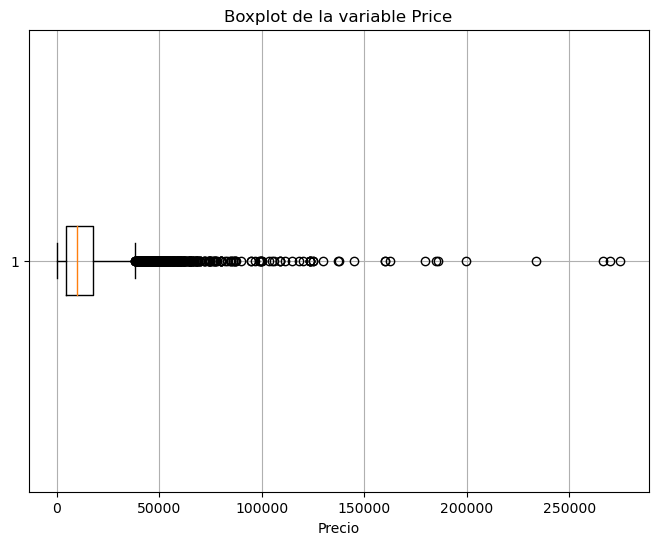

In [20]:
# Boxplot de la variable sin los valores atípicos
plt.figure(figsize=(8, 6)) 
plt.boxplot(vehicles_adj['price'], vert=False) 
plt.title('Boxplot de la variable Price')
plt.xlabel('Precio')  
plt.grid(True)  
plt.show()

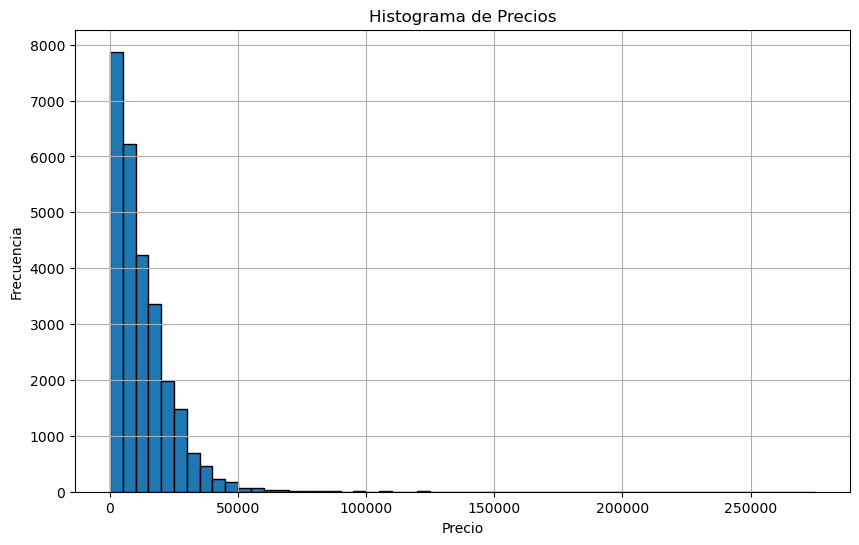

In [21]:
# Definir los intervalos
intervalos = range(0, max(vehicles_adj['price']) + 5000, 5000)

# Crear el histograma
plt.figure(figsize=(10, 6))  # Tamaño de la gráfica
plt.hist(vehicles_adj['price'], bins=intervalos, edgecolor='black')  # Crear el histograma
plt.title('Histograma de Precios')  # Título de la gráfica
plt.xlabel('Precio')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.show()

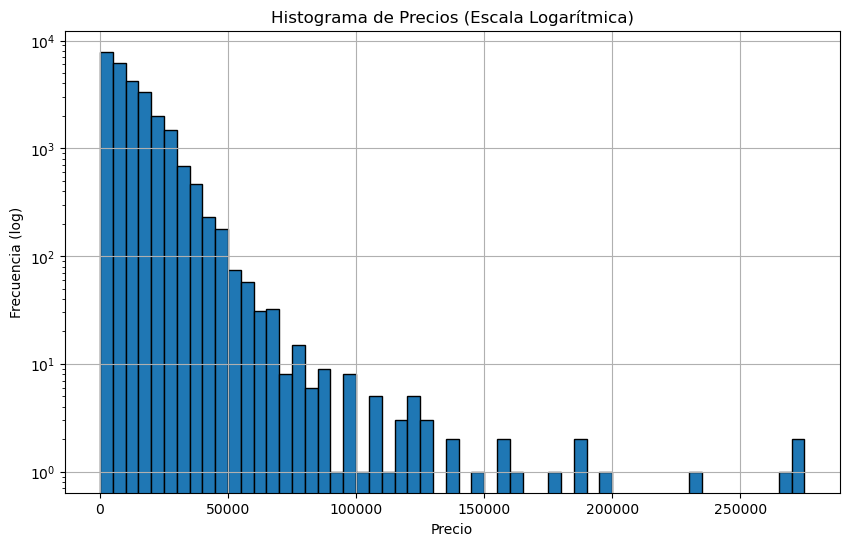

In [22]:
# Definir los intervalos
intervalos = range(0, max(vehicles_adj['price']) + 5000, 5000)

# Crear el histograma con escala logarítmica en el eje y
plt.figure(figsize=(10, 6))  # Tamaño de la gráfica
plt.hist(vehicles['price'], bins=intervalos, edgecolor='black')  # Crear el histograma
plt.yscale('log')  # Escala logarítmica en el eje y
plt.title('Histograma de Precios (Escala Logarítmica)')  # Título de la gráfica
plt.xlabel('Precio')  # Etiqueta del eje x
plt.ylabel('Frecuencia (log)')  # Etiqueta del eje y
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.show()

In [23]:
# Se define un mínimo de 100 USD para el precio
# Cuenta cuántas observaciones > 100
(vehicles_adj['price'] >= 100).sum()

24419

In [25]:
# Cuenta cuántas observaciones tienen precio de 0
vehicles_adj = vehicles_adj[vehicles_adj['price'] >= 100]

In [26]:
24419/26894 * 100

90.79720383728713

## 3.1.2 Log Price

In [27]:
# Se crea una variable con el logaritmo del precio
vehicles_adj['log_price'] = np.log(vehicles_adj['price'])

## 3.3 Manufacturer

In [30]:
# Valores faltantes
a = vehicles_adj['manufacturer'].isnull().sum()
print (a, ' valores nulos')
print (round(a / len(vehicles['manufacturer'])*100, 2), '% de valores nulos')

1040  valores nulos
3.85 % de valores nulos


In [31]:
vehicles_adj['manufacturer'].value_counts()

manufacturer
ford               4506
chevrolet          3495
toyota             1917
nissan             1309
honda              1265
ram                1122
gmc                1063
jeep               1049
dodge               834
bmw                 755
mercedes-benz       614
hyundai             582
volkswagen          483
subaru              483
kia                 422
chrysler            388
cadillac            374
buick               332
lexus               317
audi                295
mazda               262
infiniti            205
acura               192
lincoln             168
pontiac             150
volvo               146
mitsubishi          116
mini                110
mercury              97
saturn               93
rover                80
jaguar               65
fiat                 50
tesla                15
harley-davidson       8
alfa-romeo            6
ferrari               4
land rover            3
porche                2
datsun                2
Name: count, dtype: int64

## 3.4 Model

In [33]:
# Valores faltantes
a = vehicles_adj['model'].isnull().sum()
print (a, ' valores nulos')
print (round(a / len(vehicles_adj['model'])*100, 2), '% de valores nulos')

359  valores nulos
1.47 % de valores nulos


In [34]:
vehicles_adj['model'].value_counts()

model
f-150                        535
1500                         295
silverado 1500               288
silverado                    256
civic                        191
                            ... 
impreza outback sport awd      1
cherokee xj limited            1
HONDA\ODYSSEY                  1
silverado 3500hd 4x4           1
xt5                            1
Name: count, Length: 6034, dtype: int64

## 3.5 Condition

In [35]:
# Valores faltantes
a = vehicles_adj['condition'].isnull().sum()
print(a, ' valores faltantes')
print(round(a / len(vehicles_adj['condition'])*100,2),'% de valores nulos')

10010  valores faltantes
40.99 % de valores nulos


In [36]:
vehicles_adj['condition'].value_counts()

condition
excellent    6670
good         5841
like new     1401
fair          397
new            59
salvage        41
Name: count, dtype: int64

In [37]:
# Reemplazar los valores nulos en la columna 'condition' por 'unknown'
vehicles_adj['condition'].fillna('unknown', inplace=True)

In [38]:
vehicles_adj['condition'].value_counts()

condition
unknown      10010
excellent     6670
good          5841
like new      1401
fair           397
new             59
salvage         41
Name: count, dtype: int64

## 3.6 Cylinders

In [39]:
# Se observa un valor alto de valores faltantes
a = vehicles_adj['cylinders'].isnull().sum()
print(a, ' valores faltantes')
print(round(a / len(vehicles_adj['cylinders'])*100,2),'% de valores nulos')

9986  valores faltantes
40.89 % de valores nulos


In [40]:
vehicles_adj['cylinders'].value_counts()

cylinders
6 cylinders     5213
8 cylinders     4481
4 cylinders     4443
5 cylinders      123
10 cylinders      74
other             45
3 cylinders       39
12 cylinders      15
Name: count, dtype: int64

## 3.7 Fuel

In [41]:
# Valores faltantes
a = vehicles_adj['fuel'].isnull().sum()
print(a, ' valores faltantes')
print(round(a / len(vehicles_adj['fuel'])*100,2),'% de valores nulos')

153  valores faltantes
0.63 % de valores nulos


In [42]:
#Categorias
vehicles_adj['fuel'].value_counts()

fuel
gas         21323
diesel       1935
other         717
hybrid        232
electric       59
Name: count, dtype: int64

## 3.8 Odometer

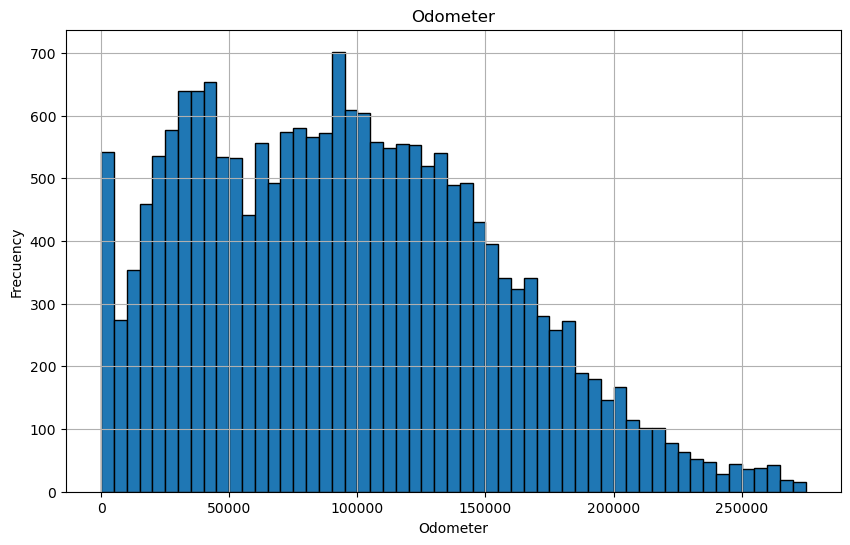

In [43]:
# Definir los intervalos
# Crear el histograma
plt.figure(figsize=(10, 6))  # Tamaño de la gráfica
plt.hist(vehicles_adj['odometer'], bins=intervalos, edgecolor='black')  # Crear el histograma
plt.title('Odometer')  # Título de la gráfica
plt.xlabel('Odometer')  # Etiqueta del eje x
plt.ylabel('Frecuency')  # Etiqueta del eje y
plt.grid(True)  # Agregar una cuadrícula al gráfico
plt.show()

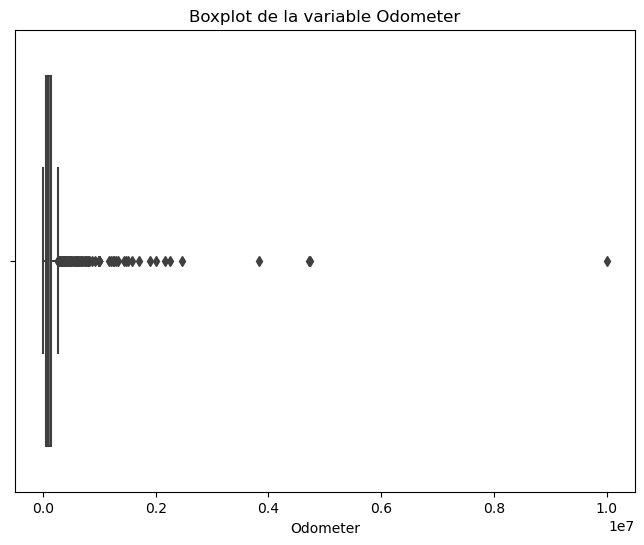

In [44]:
# Configuración del tamaño de la gráfica
plt.figure(figsize=(8, 6))

# Creación del boxplot de la variable 'odometer' utilizando Seaborn
sns.boxplot(x='odometer', data=vehicles_adj)

# Título del gráfico
plt.title('Boxplot de la variable Odometer')

# Etiqueta del eje x
plt.xlabel('Odometer')

# Muestra el gráfico
plt.show()

In [45]:
# Encuentra los tres valores más altos de la columna 'odometer'
valores_atipicos = vehicles_adj['odometer'].nlargest(4)

# Elimina las filas que contienen estos valores altos
vehicles_adj = vehicles_adj.drop(valores_atipicos.index)

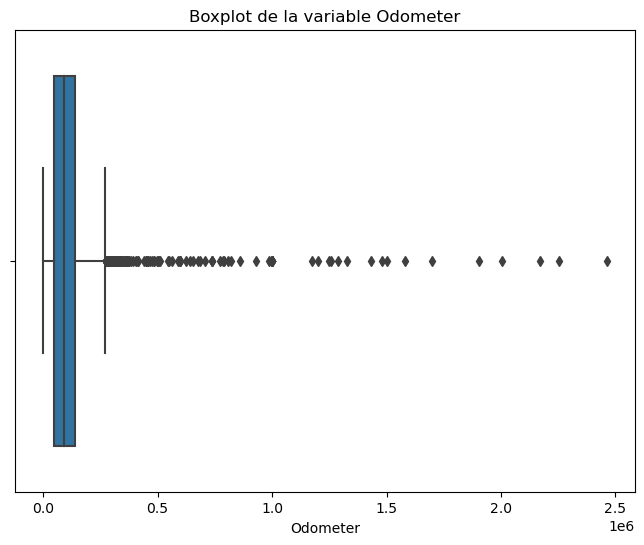

In [46]:
# Configuración del tamaño de la gráfica
plt.figure(figsize=(8, 6))

# Creación del boxplot de la variable 'odometer' utilizando Seaborn
sns.boxplot(x='odometer', data=vehicles_adj)

# Título del gráfico
plt.title('Boxplot de la variable Odometer')

# Etiqueta del eje x
plt.xlabel('Odometer')

# Muestra el gráfico
plt.show()

## 3.9 Title Status

In [48]:
# Vehicle Identification Number
# Is a unique identifier and does not give information useful for the model
a = vehicles_adj['title_status'].isnull().sum()
print(a, ' Valores nulos')
print(round(a / len(vehicles_adj['title_status']) * 100, 2), ' % Valores nulos')
b = vehicles_adj['title_status'].nunique()
print (b, 'valores únicos')

106  Valores nulos
0.43  % Valores nulos
6 valores únicos


## 3.10 Transmission

In [50]:
# Valores nulos
a = vehicles_adj['transmission'].isnull().sum()
print(a, ' Valores nulos')
print(round(a / len(vehicles_adj['transmission']) * 100, 2), ' % Valores nulos')
b = vehicles_adj['transmission'].nunique()
print (b, 'valores únicos')

211  Valores nulos
0.86  % Valores nulos
3 valores únicos


In [51]:
# Valores nulos
vehicles_adj['transmission'].value_counts()

transmission
automatic    21282
manual        1646
other         1276
Name: count, dtype: int64

## 3.11 Vin

In [53]:
# Vehicle Identification Number
# Is a unique identifier and does not give information useful for the model
a = vehicles['vin'].isnull().sum()
print(round(a / len(vehicles_adj['vin']) * 100, 2), ' % Valores nulos')
print(a, ' Valores nulos')

b = vehicles['vin'].nunique()
print (b, 'valores únicos')

44.53  % Valores nulos
10872  Valores nulos
14809 valores únicos


In [54]:
print(vehicles['vin'].value_counts().head(20))

vin
WDZPE7CC9D5767661    13
WP0CA2991XS652065     7
1ZVBP8FF4C5208577     5
3C6UD5FL7CG250072     5
000000000000          5
JTKKT604260166852     5
1FTEW1CP1HKC20511     5
2C3CDZBG9FH740753     5
1FA6P8TH4H5217450     5
1FTNW20F0YEB73052     5
1FTEW1CPXGKE39286     5
1FT7W2BT2EEB51948     5
3C6UD5DL1CG199509     4
1J4BA5H1XAL136615     4
5GRGN23U53H104188     4
3C6UR5CL5EG272533     4
1HGCM66556A014875     4
2T2HA31U24C027906     4
3C6UR5DL1EG217589     4
1GB0G2CF4F1120818     4
Name: count, dtype: int64


In [55]:
# The same car in different regions

vehicles_vin = vehicles[vehicles['vin']=='WDZPE7CC9D5767661']
vehicles_vin.head(13)

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,vin,drive,size,type,paint_color,description,county,state,lat,long
3363,stockton,34900,2013.0,mercedes-benz,benze sprinter 2500,excellent,6 cylinders,diesel,23893.0,clean,...,WDZPE7CC9D5767661,rwd,NaN,van,black,Call/Text Jim anytime: 936-349-6038 2013 Merc...,NaN,ca,30.9533,-95.9091
5546,north central FL,34900,2013.0,mercedes-benz,benze sprinter 2500,excellent,6 cylinders,diesel,23893.0,clean,...,WDZPE7CC9D5767661,rwd,NaN,van,black,Call/Text Jim anytime: 936-349-6038 2013 Merc...,NaN,fl,30.9533,-95.9091
7086,imperial county,34900,2013.0,mercedes-benz,benze sprinter 2500,excellent,6 cylinders,diesel,23893.0,clean,...,WDZPE7CC9D5767661,rwd,NaN,van,black,Call/Text Jim anytime: 936-349-6038 2013 Merc...,NaN,ca,30.9533,-95.9091
7396,eugene,34900,2013.0,mercedes-benz,benze sprinter 2500,excellent,6 cylinders,diesel,23893.0,clean,...,WDZPE7CC9D5767661,rwd,NaN,van,black,Call/Text Jim anytime: 936-349-6038 2013 Merc...,NaN,or,30.9533,-95.9091
8319,ventura county,34900,2013.0,mercedes-benz,benze sprinter 2500,excellent,6 cylinders,diesel,23893.0,clean,...,WDZPE7CC9D5767661,rwd,NaN,van,black,Call/Text Jim anytime: 936-349-6038 2013 Merc...,NaN,ca,30.9533,-95.9091
12116,north jersey,34900,2013.0,mercedes-benz,benze sprinter 2500,excellent,6 cylinders,diesel,23893.0,clean,...,WDZPE7CC9D5767661,rwd,NaN,van,black,Call/Text Jim anytime: 936-349-6038 2013 Merc...,NaN,nj,30.9533,-95.9091
16689,columbus,34900,2013.0,mercedes-benz,benze sprinter 2500,excellent,6 cylinders,diesel,23893.0,clean,...,WDZPE7CC9D5767661,rwd,NaN,van,black,Call/Text Jim anytime: 936-349-6038 2013 Merc...,NaN,oh,30.9533,-95.9091
18080,stockton,34900,2013.0,mercedes-benz,benze sprinter 2500,excellent,6 cylinders,diesel,23893.0,clean,...,WDZPE7CC9D5767661,rwd,NaN,van,black,Call/Text Jim anytime: 936-349-6038 2013 Merc...,NaN,ca,30.9533,-95.9091
18384,lincoln,34900,2013.0,mercedes-benz,benze sprinter 2500,excellent,6 cylinders,diesel,23893.0,clean,...,WDZPE7CC9D5767661,rwd,NaN,van,black,Call/Text Jim anytime: 936-349-6038 2013 Merc...,NaN,ne,30.9533,-95.9091
21529,space coast,34900,2013.0,mercedes-benz,benze sprinter 2500,excellent,6 cylinders,diesel,23893.0,clean,...,WDZPE7CC9D5767661,rwd,NaN,van,black,Call/Text Jim anytime: 936-349-6038 2013 Merc...,NaN,fl,30.9533,-95.9091


## 3.13 Size

In [56]:
# Valores Nulos

a = vehicles_adj['size'].isnull().sum()
print(a, ' valores nulos')
print (round(a / len(vehicles_adj['size']) *100, 2), "% de valores nulos")

16951  valores nulos
69.43 % de valores nulos


In [57]:
print(vehicles_adj['size'].value_counts())

size
full-size      4029
mid-size       2061
compact        1186
sub-compact     188
Name: count, dtype: int64


## 3.15 Paint Color

In [58]:
# Valores Nulos

a = vehicles['paint_color'].isnull().sum()
print(a, ' valores nulos')
print (round(a / len(vehicles['paint_color']) *100, 2), "% de valores nulos")

8790  valores nulos
32.57 % de valores nulos


In [59]:
vehicles['paint_color'].value_counts()

paint_color
white     5007
black     3604
silver    2734
blue      1776
red       1766
grey      1757
green      447
custom     429
brown      397
yellow     135
orange     112
purple      34
Name: count, dtype: int64

## 3.18 State - Postal

In [65]:
# Valores Nulos

a = vehicles['state'].isnull().sum()
print(a, ' valores nulos')
print (round(a / len(vehicles['state']) *100, 2), "% de valores nulos")

0  valores nulos
0.0 % de valores nulos


In [66]:
vehicles_adj['state'].value_counts()

state
ca    5689
fl    3243
tx    2111
mi    1337
ny    1268
oh    1008
pa     911
nc     893
or     877
wa     635
wi     604
tn     580
va     455
co     438
il     385
ia     322
ma     304
nj     285
mt     280
mn     277
id     263
sc     241
az     219
al     200
ga     187
in     165
mo     135
ct     129
ks     125
ky     125
ok     107
ar     106
la      79
md      73
ak      53
nm      51
ne      32
nv      30
dc      30
me      26
ms      22
vt      22
ri      20
hi      20
nh      20
sd      13
wv       8
wy       4
de       4
ut       2
nd       2
Name: count, dtype: int64

In [72]:
vehicles_adj = vehicles_adj.rename(columns={'state': 'Postal'})

In [73]:
print(vehicles_adj)

                      region  price    year manufacturer  \
0               palm springs   3400  2002.0   volkswagen   
1                      salem   6300  2004.0    chevrolet   
2                long island   9997  2011.0       nissan   
3                   amarillo  21504  2017.0    chevrolet   
4              inland empire  28900  2009.0     cadillac   
...                      ...    ...     ...          ...   
26982         ventura county   4995  2006.0   volkswagen   
26983     mcallen / edinburg   7200  2007.0    chevrolet   
26985  ft myers / SW florida  10000  2002.0    chevrolet   
26986                 tucson   3800  2005.0        dodge   
26987            los angeles  21800  2013.0          bmw   

                              model  condition    cylinders    fuel  odometer  \
0                         jetta gls  excellent  4 cylinders     gas  100000.0   
1           silverado 2500 crew cab    unknown  8 cylinders     gas  208942.0   
2                            xterra 

### 3.21 Poverty and Crashes

In [74]:
# Realiza la combinación de los DataFrames en función de la columna 'Postal'
vehicles_adj = vehicles_adj.merge(counties[['Postal', 'State']], on='Postal', how='left')

# Renombra la columna 'state' resultante como 'state2'
#vehicles_counties.rename(columns={'state': 'state2'}, inplace=True)

# Muestra las primeras filas del DataFrame resultante para verificar el cambio
print(vehicles_adj.head())

          region  price    year manufacturer                    model  \
0   palm springs   3400  2002.0   volkswagen                jetta gls   
1          salem   6300  2004.0    chevrolet  silverado 2500 crew cab   
2    long island   9997  2011.0       nissan                   xterra   
3       amarillo  21504  2017.0    chevrolet                   malibu   
4  inland empire  28900  2009.0     cadillac                    cts-v   

   condition    cylinders fuel  odometer title_status  ...      size    type  \
0  excellent  4 cylinders  gas  100000.0        clean  ...       NaN   wagon   
1    unknown  8 cylinders  gas  208942.0        clean  ...       NaN  pickup   
2  excellent          NaN  gas  125666.0        clean  ...       NaN     NaN   
3    unknown  4 cylinders  gas   24218.0        clean  ...  mid-size   sedan   
4  excellent  8 cylinders  gas   61000.0        clean  ...  mid-size   sedan   

  paint_color                                        description county  \
0    

In [75]:
vehicles_adj = vehicles_adj.merge(crashes_poverty[['State', 'Number of Crashes', 'Poverty']], on='State', how='left')
vehicles_adj

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,paint_color,description,county,Postal,lat,long,log_price,State,Number of Crashes,Poverty
0,palm springs,3400,2002.0,volkswagen,jetta gls,excellent,4 cylinders,gas,100000.0,clean,...,NaN,This 2002 Volkswagen Jetta GLS Wagon is simply...,NaN,ca,33.7451,-116.3520,8.131531,California,116.0,12.8
1,salem,6300,2004.0,chevrolet,silverado 2500 crew cab,unknown,8 cylinders,gas,208942.0,clean,...,white,We want to let you know up front that Synergiz...,NaN,or,44.9225,-123.3200,8.748305,Oregon,125.0,12.5
2,long island,9997,2011.0,nissan,xterra,excellent,NaN,gas,125666.0,clean,...,NaN,Year : 2011 \t\t Make : NISSAN \t\t\tMode...,NaN,ny,40.8004,-73.0058,9.210040,New York,156.0,13.7
3,amarillo,21504,2017.0,chevrolet,malibu,unknown,4 cylinders,gas,24218.0,clean,...,red,Use this link to see more information on this ...,NaN,tx,35.1773,-101.7940,9.975994,Texas,268.0,14.9
4,inland empire,28900,2009.0,cadillac,cts-v,excellent,8 cylinders,gas,61000.0,clean,...,silver,"2009 CTS-V, FAST! Awesome car, super clean, we...",NaN,ca,33.9748,-117.5580,10.271597,California,116.0,12.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24410,ventura county,4995,2006.0,volkswagen,jetta,unknown,NaN,diesel,132212.0,clean,...,NaN,2006 Volkswagen Jetta TDI Offered by: Rega...,NaN,ca,34.1835,-118.9080,8.516193,California,116.0,12.8
24411,mcallen / edinburg,7200,2007.0,chevrolet,tahoe lt,fair,8 cylinders,gas,210000.0,clean,...,grey,"Selling a 2007 chevy tahoe lt 5.3 lt V8 210,00...",NaN,tx,26.1694,-97.9887,8.881836,Texas,268.0,14.9
24412,ft myers / SW florida,10000,2002.0,chevrolet,corvette,unknown,NaN,gas,NaN,clean,...,NaN,"Good condition, reply to post to see, nights a...",NaN,fl,26.2925,-81.5947,9.210340,Florida,1011.0,13.7
24413,tucson,3800,2005.0,dodge,grand caravan,unknown,NaN,gas,NaN,clean,...,NaN,"2005 Dodge grand caravan, $3,800, title clean,...",NaN,az,32.1422,-111.0510,8.242756,Arizona,249.0,14.1


In [76]:
vehicles_adj = vehicles_adj.drop(["vin", "county", "lat", "long"], axis=1)

In [77]:
vehicles_adj.shape

(24415, 21)

In [78]:
print(vehicles_adj)

                      region  price    year manufacturer  \
0               palm springs   3400  2002.0   volkswagen   
1                      salem   6300  2004.0    chevrolet   
2                long island   9997  2011.0       nissan   
3                   amarillo  21504  2017.0    chevrolet   
4              inland empire  28900  2009.0     cadillac   
...                      ...    ...     ...          ...   
24410         ventura county   4995  2006.0   volkswagen   
24411     mcallen / edinburg   7200  2007.0    chevrolet   
24412  ft myers / SW florida  10000  2002.0    chevrolet   
24413                 tucson   3800  2005.0        dodge   
24414            los angeles  21800  2013.0          bmw   

                              model  condition    cylinders    fuel  odometer  \
0                         jetta gls  excellent  4 cylinders     gas  100000.0   
1           silverado 2500 crew cab    unknown  8 cylinders     gas  208942.0   
2                            xterra 

In [79]:
vehicles_adj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24415 entries, 0 to 24414
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   region             24415 non-null  object 
 1   price              24415 non-null  int64  
 2   year               24365 non-null  float64
 3   manufacturer       23376 non-null  object 
 4   model              24057 non-null  object 
 5   condition          24415 non-null  object 
 6   cylinders          14430 non-null  object 
 7   fuel               24262 non-null  object 
 8   odometer           20007 non-null  float64
 9   title_status       24309 non-null  object 
 10  transmission       24204 non-null  object 
 11  drive              17149 non-null  object 
 12  size               7464 non-null   object 
 13  type               17874 non-null  object 
 14  paint_color        16575 non-null  object 
 15  description        24412 non-null  object 
 16  Postal             244

## 4. Analisis Conjunto

### 4.7.1 Year vs Price

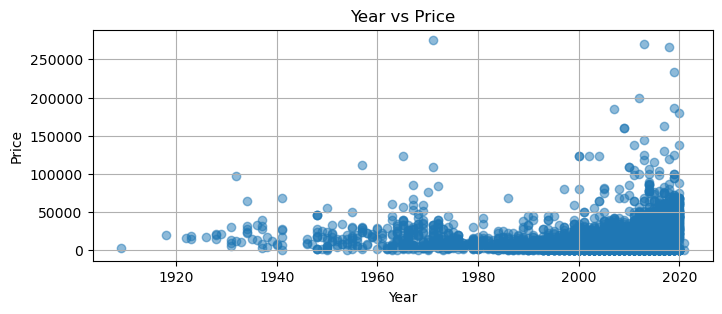

In [80]:
# Crea la gráfica de dispersión
plt.figure(figsize=(8, 3))  # Tamaño de la gráfica
plt.scatter(vehicles_adj['year'], vehicles_adj['price'], alpha=0.5)  # Crea la gráfica de dispersión
plt.title('Year vs Price')  # Título de la gráfica
plt.xlabel('Year')  # Etiqueta del eje x
plt.ylabel('Price')  # Etiqueta del eje y
plt.grid(True) 
plt.show()

### 4.2 Year vs Odometer

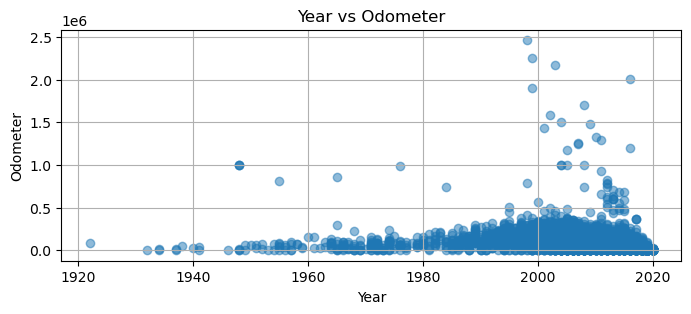

In [81]:
# Crea la gráfica de dispersión
plt.figure(figsize=(8, 3))  # Tamaño de la gráfica
plt.scatter(vehicles_adj['year'], vehicles_adj['odometer'], alpha=0.5)  # Crea la gráfica de dispersión
plt.title('Year vs Odometer')  # Título de la gráfica
plt.xlabel('Year')  # Etiqueta del eje x
plt.ylabel('Odometer')  # Etiqueta del eje y
plt.grid(True)  # Agrega una cuadrícula al gráfico
plt.show()

### 4.3 Price vs Poverty

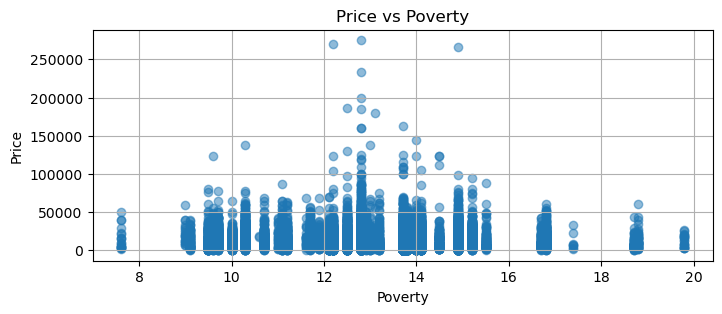

In [89]:
# Crea la gráfica de dispersión
plt.figure(figsize=(8, 3))  # Tamaño de la gráfica
plt.scatter(vehicles_adj['Poverty'], vehicles_adj['price'], alpha=0.5)  # Crea la gráfica de dispersión
plt.title('Price vs Poverty')  # Título de la gráfica
plt.xlabel('Poverty')  # Etiqueta del eje x
plt.ylabel('Price')  # Etiqueta del eje y
plt.grid(True)  # Agrega una cuadrícula al gráfico
plt.show()

## 4.4 Number of Crashes vs Price

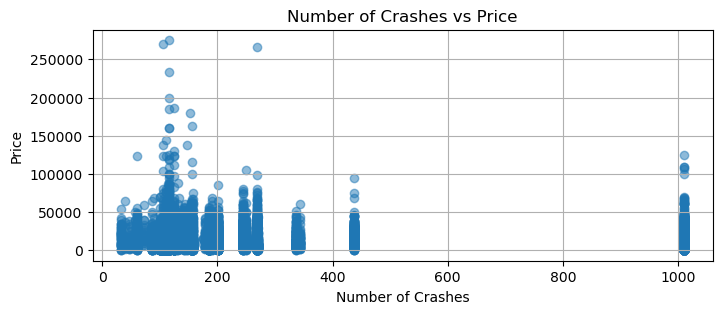

In [91]:
# Crea la gráfica de dispersión
plt.figure(figsize=(8, 3))  # Tamaño de la gráfica
plt.scatter(vehicles_adj['Number of Crashes'], vehicles_adj['price'], alpha=0.5)  # Crea la gráfica de dispersión
plt.title('Number of Crashes vs Price')  # Título de la gráfica
plt.xlabel('Number of Crashes')  # Etiqueta del eje x
plt.ylabel('Price')  # Etiqueta del eje y
plt.grid(True)  # Agrega una cuadrícula al gráfico
plt.show()

## 4.3 Correlation

In [92]:
vehicles_adj.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'description', 'Postal',
       'log_price', 'State', 'Number of Crashes', 'Poverty'],
      dtype='object')

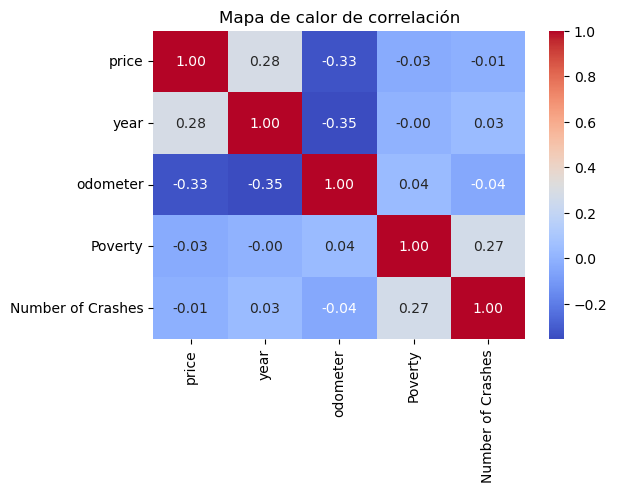

In [84]:
# Calcula la matriz de correlación
vehicles_num= vehicles_adj[['price', 'year', 'odometer', 'Poverty', 'Number of Crashes']]

matriz_correlacion = vehicles_num.corr()

# Crea un mapa de calor con Seaborn para visualizar la matriz de correlación
plt.figure(figsize=(6, 4))  # Tamaño del gráfico
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")  # crea el mapa de calor
plt.title('Mapa de calor de correlación')  # Título del gráfico
plt.show()

## 5. Modelo de pronóstico

In [93]:

# Dividir los datos en características (X) y etiquetas (y)
X = vehicles_adj[['year', 'odometer', 'manufacturer', 'model', 'fuel', 'transmission', 'condition']]
y = vehicles_adj['log_price']

In [94]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Definir las columnas categóricas y las númericas
categorical_features = ['manufacturer', 'model', 'fuel', 'transmission','condition']
numerical_features = ['year', 'odometer']

In [95]:
# Crear un pipeline para preprocesar las características
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='mean')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [96]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', SimpleImputer(strategy='mean'), numerical_features)
    ])

In [97]:
# Crear el pipeline del modelo
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [98]:
# LOG PRICE

# ['year', 'odometer', 'manufacturer', 'model', 'fuel', 'transmission', 'condition']

inicio = time.time()

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# Guarda el tiempo de finalización
fin = time.time()

# Calcula el tiempo transcurrido
tiempo_transcurrido = fin - inicio

# Imprime el tiempo transcurrido en segundos
print("Tiempo transcurrido:", tiempo_transcurrido/60, "minutos")

print(f"Puntuación de entrenamiento: {train_score}")
print(f"Puntuación de prueba: {test_score}")

Tiempo transcurrido: 6.600066689650218 minutos
Puntuación de entrenamiento: 0.9331009486186286
Puntuación de prueba: 0.5410141171241292
